## 2. 엔터사의 주가와 소속가수 컴백의 관련성 분석

- 가설: 소속 가수의 앨범이 나오면 화제성 및 수익이 증가하므로 해당 엔터사의 주가 또한 상승할 것으로 예측된다. <br><br>
- 분석 과정: 대표 3사의 주가 경향성이 비슷하므로, 한 회사의 소속가수가 컴백할 기간에 그 회사만 주가 변동성이 높은지 알아보고자 한다. <br> 
때문에, 연간 대표 3사의 대표 앨범을 선정하여 해당 앨범이 나온 컴백 날짜를 수집해 컴백 기간을 정하여 분석하고자 한다.

대표 엔터사 3사의 연간 대표 앨범 선정 방법) <br>
- 써클차트(가온차트) 연간 앨범 판매량 순위 크롤링<br>
-> 3사와 관련된 앨범만 뽑아서 해당 앨범 날짜 추출

컴백 기간) 컴백 날짜 이후 10 거래일을 컴백 기간으로 설정한다.

분석 과정)
1. ERD 설계 및 DB 생성
2. 5년 간 대표 3사 주식 크롤링
3. 연간 앨범 판매량 순위 차트 크롤링
4. 연간 앨범 차트에 있는 앨범들의 출시 날짜 크롤링
5. 분석

### 1) ERD 설계 및 DB 생성

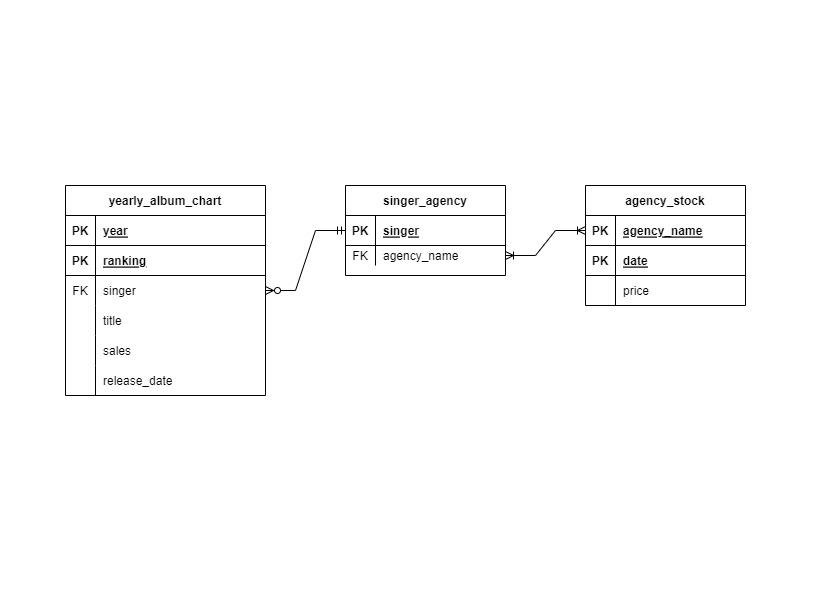

In [24]:
from IPython.display import Image
Image("data/stock_pj_erd.jpg")

----

### 2) 5년 간 대표 3사 주식 크롤링

In [11]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [18]:
# 주식 종목 코드로 종가 데이터를 추출하여 stocks_df 에 저장하는 함수
def create_stocks_df(stocks, start_date, end_date):
    stock_df = fdr.DataReader(stock_code_list[stocks], start_date, end_date)
    stocks_df[stocks] = stock_df['Close'] # 날짜별 종가 추출

    return stocks_df

stock_code_list = {'JYP':'035900', 'SM':'041510', 'YG':'122870'}
stocks_df = pd.DataFrame()

for stocks in stock_code_list.keys():
    create_stocks_df(stocks, '2018-01-01', '2023-01-01')

stocks_df.head()

,JYP,SM,YG
Date,,,
2018-01-02,13350,34750,28600
2018-01-03,13150,33500,28200
2018-01-04,12800,33000,27300
2018-01-05,13350,33700,27600
2018-01-08,12900,33650,27000


In [21]:
stocks_df.shape

(1232, 4)

### 수정

agency_stock 테이블의 date는 주가가 있는 날 (주말 및 공휴일 제외)에만 데이터가 있기 때문에 yearly_album_chart 테이블의 release_date가 참조할 컬럼이 없어 db에 insert 시 오류가 난다. 때문에, stocks_df를 ('agency_name', 'date', 'stock_price')로 다시 생성해야 한다.

In [19]:
agency_list = list(stocks_df.columns)
stocks_df.reset_index(inplace=True)

five_year_stocks_df = pd.DataFrame()

for agency in agency_list:
    agency_stocks_df = pd.DataFrame()
    agency_stocks_df['agency_name'] = [agency for _ in range(len(stocks_df))]
    agency_stocks_df['date'] = stocks_df['Date']
    agency_stocks_df['stock_price'] = stocks_df[agency]
    five_year_stocks_df = pd.concat([five_year_stocks_df,agency_stocks_df])

five_year_stocks_df.head()

,agency_name,date,stock_price
0,JYP,2018-01-02,13350
1,JYP,2018-01-03,13150
2,JYP,2018-01-04,12800
3,JYP,2018-01-05,13350
4,JYP,2018-01-08,12900


In [20]:
five_year_stocks_df.shape

(3696, 3)

In [ ]:
# five_year_stocks_df.to_csv('data/five_year_stocks_df.csv', index=False)